In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [5]:
# Load the data
data = pd.read_csv('gold_prices.csv')



In [6]:
data

,Date,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price
0,1968-01-02 09:00:00+00:00,35.18,1131.06,14.64,470.69,NaN,NaN
1,1968-01-30 09:00:00+00:00,35.19,1131.38,14.59,469.08,NaN,NaN
2,1968-02-01 09:00:00+00:00,35.20,1131.70,14.59,469.08,NaN,NaN
3,1968-03-01 09:00:00+00:00,35.20,1131.70,14.66,471.33,NaN,NaN
4,1968-04-01 09:00:00+00:00,38.00,1221.73,15.81,508.30,NaN,NaN
...,...,...,...,...,...,...,...
1172,2024-05-01 00:00:28+00:00,2294.31,73763.67,1837.04,59062.12,2151.00,69156.16
1173,2024-05-20 05:48:20+00:00,2452.66,78854.74,NaN,NaN,NaN,NaN
1174,2024-05-30 00:00:21+00:00,2340.71,75255.46,1843.47,59268.85,2167.13,69674.75
1175,2024-05-31 13:52:15+00:00,2353.94,75680.82,NaN,NaN,NaN,NaN


In [7]:
# Preprocessing
# Convert date to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Handle missing values if any (e.g., fill with mean)
data.fillna(data.mean(), inplace=True)



In [8]:
data

,gold_oz_usd_price,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price
Date,,,,,,
1968-01-02 09:00:00+00:00,35.180000,1131.060000,14.640000,470.690000,919.01757,29547.058237
1968-01-30 09:00:00+00:00,35.190000,1131.380000,14.590000,469.080000,919.01757,29547.058237
1968-02-01 09:00:00+00:00,35.200000,1131.700000,14.590000,469.080000,919.01757,29547.058237
1968-03-01 09:00:00+00:00,35.200000,1131.700000,14.660000,471.330000,919.01757,29547.058237
1968-04-01 09:00:00+00:00,38.000000,1221.730000,15.810000,508.300000,919.01757,29547.058237
...,...,...,...,...,...,...
2024-05-01 00:00:28+00:00,2294.310000,73763.670000,1837.040000,59062.120000,2151.00000,69156.160000
2024-05-20 05:48:20+00:00,2452.660000,78854.740000,438.096831,14085.119702,919.01757,29547.058237
2024-05-30 00:00:21+00:00,2340.710000,75255.460000,1843.470000,59268.850000,2167.13000,69674.750000


In [9]:
# Feature and target variables
X = data.drop(columns=['gold_oz_usd_price'])
y = data['gold_oz_usd_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
X

,gold_kg_usd_price,gold_oz_gbp_price,gold_kg_gbp_price,gold_oz_eur_price,gold_kg_eur_price
Date,,,,,
1968-01-02 09:00:00+00:00,1131.060000,14.640000,470.690000,919.01757,29547.058237
1968-01-30 09:00:00+00:00,1131.380000,14.590000,469.080000,919.01757,29547.058237
1968-02-01 09:00:00+00:00,1131.700000,14.590000,469.080000,919.01757,29547.058237
1968-03-01 09:00:00+00:00,1131.700000,14.660000,471.330000,919.01757,29547.058237
1968-04-01 09:00:00+00:00,1221.730000,15.810000,508.300000,919.01757,29547.058237
...,...,...,...,...,...
2024-05-01 00:00:28+00:00,73763.670000,1837.040000,59062.120000,2151.00000,69156.160000
2024-05-20 05:48:20+00:00,78854.740000,438.096831,14085.119702,919.01757,29547.058237
2024-05-30 00:00:21+00:00,75255.460000,1843.470000,59268.850000,2167.13000,69674.750000


In [11]:
y

Date
1968-01-02 09:00:00+00:00      35.180000
1968-01-30 09:00:00+00:00      35.190000
1968-02-01 09:00:00+00:00      35.200000
1968-03-01 09:00:00+00:00      35.200000
1968-04-01 09:00:00+00:00      38.000000
                                ...     
2024-05-01 00:00:28+00:00    2294.310000
2024-05-20 05:48:20+00:00    2452.660000
2024-05-30 00:00:21+00:00    2340.710000
2024-05-31 13:52:15+00:00    2353.940000
2024-05-31 14:34:12+00:00     654.229974
Name: gold_oz_usd_price, Length: 1177, dtype: float64

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM regression model
svr = SVR()



In [13]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 0.3],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_svr = SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel'])
best_svr.fit(X_train, y_train)



Best parameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}


SVR(C=100, kernel='linear')

In [14]:
# Predictions
y_pred_train = best_svr.predict(X_train)
y_pred_test = best_svr.predict(X_test)

# Evaluation
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"R^2 Score: {r2}")



Train RMSE: 0.07272865312790479
Test RMSE: 0.07225713593618355
R^2 Score: 0.9999999835312509


In [15]:
# Predicting a single new value
# Create a new sample (assuming it has the same structure as your training data)
new_sample = pd.DataFrame({
    'gold_kg_usd_price': [45000],
    'gold_oz_gbp_price': [1200],
    'gold_kg_gbp_price': [38000],
    'gold_oz_eur_price': [1100],
    'gold_kg_eur_price': [35000]
})

# Scale the new sample
new_sample_scaled = scaler.transform(new_sample)

# Predict
new_prediction = best_svr.predict(new_sample_scaled)
print(f"Predicted gold_oz_usd_price: {new_prediction[0]}")




Predicted gold_oz_usd_price: 1399.6788121491245


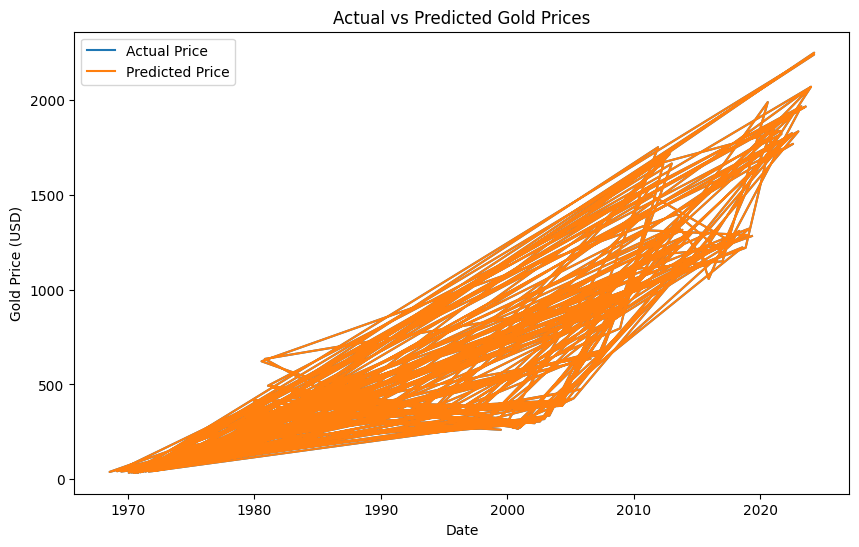

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, y_pred_test, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()
